In [1]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('src'))
from utopia.microservice.generate_object.generate_object_app import *
from utopia.utopia import utopiaModel
from utopia.preprocessing.generate_rate_constants_json import *
from utopia.results_processing_json.process_results_json import *
from utopia.preprocessing.fill_interactions_df_json import *
import pymongo
import json

In [2]:
# Load the default configuration and data from the 'data' folder.
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")

In [3]:
# Pretty print with indentation
print("Loaded Configuration Data:")
print(json.dumps(config_data, indent=2))
print("\nLoaded Input Data:")
print(json.dumps(data_data, indent=2))

Loaded Configuration Data:
{
  "big_bin_diameter_um": 5000,
  "N_sizeBins": 5,
  "vol_algal_cell_m3": 2e-16,
  "spm_density_kg_m3": 1388,
  "boxName": "Utopia",
  "comp_input_file_name": "inputs_compartments.csv",
  "comp_interactFile_name": "compartment_interactions.csv",
  "MPforms_list": [
    "freeMP",
    "heterMP",
    "biofMP",
    "heterBiofMP"
  ],
  "solver": "SteadyState",
  "compartment_types": {
    "UTOPIA_surfaceSea_water_compartments": [
      "Ocean_Surface_Water",
      "Coast_Surface_Water"
    ],
    "UTOPIA_water_compartments": [
      "Ocean_Mixed_Water",
      "Ocean_Column_Water",
      "Coast_Column_Water",
      "Surface_Freshwater",
      "Bulk_Freshwater"
    ],
    "UTOPIA_deep_soil_compartments": [
      "Beaches_Deep_Soil",
      "Background_Soil",
      "Impacted_Soil"
    ],
    "UTOPIA_soil_surface_compartments": [
      "Beaches_Soil_Surface",
      "Background_Soil_Surface",
      "Impacted_Soil_Surface"
    ],
    "UTOPIA_sediment_compartment": [
  

### Insert initial data (config_data and data_data) into database 

In [4]:
# initialization of config_data and input_data
initialize_mongo_collections()

In [5]:

from datetime import datetime
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
config_collection = db['configure_data']
input_collection = db['input_data']
config_document = config_collection.insert_one(config_data)
input_document = input_collection.insert_one(data_data)

In [6]:
# Clear the model_json collection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
model_json_collection = db["model_json"]
model_json_collection.delete_many({}) 

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

### generate_objects

In [7]:
from bson import json_util

model_json = create_model_json()
generate_coding_dictionaries()
print("\nModel JSON:")
print(json_util.dumps(model_json, indent=2))
print("\nType of model_json['particles_df']:", type(model_json["particles_df"]))

Model JSON created and inserted into MongoDB collection 'model_json'.

Model JSON:
{
  "MPdensity_kg_m3": 980,
  "MP_composition": "PE",
  "shape": "sphere",
  "MP_form": "freeMP",
  "big_bin_diameter_um": 5000,
  "N_sizeBins": 5,
  "FI": 0.5,
  "t_half_deg_free": 66000,
  "t_frag_gen_FreeSurfaceWater": 36.5,
  "heter_deg_factor": 10,
  "biof_deg_factor": 0.5,
  "factor_deepWater_soilSurface": 10,
  "factor_sediment": 100,
  "biof_frag_factor": 2,
  "heter_frag_factor": 100,
  "vol_algal_cell_m3": 2e-16,
  "spm_density_kg_m3": 1388,
  "comp_input_file_name": "inputs_compartments.csv",
  "comp_interactFile_name": "compartment_interactions.csv",
  "boxName": "Utopia",
  "MPforms_list": [
    "freeMP",
    "heterMP",
    "biofMP",
    "heterBiofMP"
  ],
  "compartments_list": [
    "Ocean_Surface_Water",
    "Ocean_Mixed_Water",
    "Ocean_Column_Water",
    "Coast_Surface_Water",
    "Coast_Column_Water",
    "Surface_Freshwater",
    "Bulk_Freshwater",
    "Sediment_Freshwater",
    "Se

In [ ]:
print(compartment_surfaceSea_water.__module__)
print(compartment_surfaceSea_water.__dict__.keys())


In [8]:
(
        system_particle_object_list_json,
        SpeciesList,
        spm_dict,
        dict_comp,
        particles_properties_df_dict
) = generate_objects_json(model_json)



Assigned Ocean_Surface_Water volume: 1630000000000000.0 m3
Assigned Ocean_Mixed_Water volume: 3.26e+16 m3
Assigned Ocean_Column_Water volume: 1.31e+18 m3
Assigned Coast_Surface_Water volume: 67100000000000.0 m3
Assigned Coast_Column_Water volume: 1340000000000000.0 m3
Assigned Surface_Freshwater volume: 9050000000000.0 m3
Assigned Bulk_Freshwater volume: 90500000000000.0 m3
Assigned Sediment_Freshwater volume: 905000000000.0 m3
Assigned Sediment_Ocean volume: 9790000000000.0 m3
Assigned Sediment_Coast volume: 2680000000000.0 m3
Assigned Beaches_Soil_Surface volume: 3440.0 m3
Assigned Beaches_Deep_Soil volume: 34400.0 m3
Assigned Background_Soil_Surface volume: 873000000000.0 m3
Assigned Background_Soil volume: 8730000000000.0 m3
Assigned Impacted_Soil_Surface volume: 607000000000.0 m3
Assigned Impacted_Soil volume: 6070000000000.0 m3
Assigned Air volume: 3.06E+18 m3
modleBoxes:  [{'Bname': 'Utopia', 'Bdepth_m': None, 'Blength_m': None, 'Bwidth_m': None, 'Bvolume_m3': None, 'Bconexions'

In [9]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
model_json_collection = db["model_json"]

# Update or insert the document with the new data
model_json_collection.find_one_and_update(
	{},  # filter (empty to match any document)
	{
		"$set": {
			"system_particle_object_list": system_particle_object_list_json,
			"SpeciesList": SpeciesList,
			"spm": spm_dict,
			"dict_comp": dict_comp,
			"particles_properties_df": particles_properties_df_dict
		}
	},
	upsert=True
)

{'_id': ObjectId('685b1d2f187e12bbd0e6b3d2'),
 'MPdensity_kg_m3': 980,
 'MP_composition': 'PE',
 'shape': 'sphere',
 'MP_form': 'freeMP',
 'big_bin_diameter_um': 5000,
 'N_sizeBins': 5,
 'FI': 0.5,
 't_half_deg_free': 66000,
 't_frag_gen_FreeSurfaceWater': 36.5,
 'heter_deg_factor': 10,
 'biof_deg_factor': 0.5,
 'factor_deepWater_soilSurface': 10,
 'factor_sediment': 100,
 'biof_frag_factor': 2,
 'heter_frag_factor': 100,
 'vol_algal_cell_m3': 2e-16,
 'spm_density_kg_m3': 1388,
 'comp_input_file_name': 'inputs_compartments.csv',
 'comp_interactFile_name': 'compartment_interactions.csv',
 'boxName': 'Utopia',
 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'],
 'compartments_list': ['Ocean_Surface_Water',
  'Ocean_Mixed_Water',
  'Ocean_Column_Water',
  'Coast_Surface_Water',
  'Coast_Column_Water',
  'Surface_Freshwater',
  'Bulk_Freshwater',
  'Sediment_Freshwater',
  'Sediment_Ocean',
  'Sediment_Coast',
  'Beaches_Soil_Surface',
  'Beaches_Deep_Soil',
  'Background_Soil

In [10]:
model_json = model_json_collection.find_one()
for key in model_json.keys():
    print(key)

model_id = model_json['_id']

_id
MPdensity_kg_m3
MP_composition
shape
MP_form
big_bin_diameter_um
N_sizeBins
FI
t_half_deg_free
t_frag_gen_FreeSurfaceWater
heter_deg_factor
biof_deg_factor
factor_deepWater_soilSurface
factor_sediment
biof_frag_factor
heter_frag_factor
vol_algal_cell_m3
spm_density_kg_m3
comp_input_file_name
comp_interactFile_name
boxName
MPforms_list
compartments_list
solver
compartment_types
radius_algae_m
spm_radius_um
emiss_dict_g_s
particles_df
base_path
MP_form_dict_reverse
comp_dict_inverse
dict_size_coding
particle_compartmentCoding
particle_forms_coding
size_dict
SpeciesList
dict_comp
particles_properties_df
spm
system_particle_object_list


In [11]:
print(model_json["dict_comp"]["Ocean_Surface_Water"])
print("\nSystem Particle Object List JSON:")
print(json.dumps(system_particle_object_list_json, indent=2))
print("\nSpecies List:")
print(json.dumps(SpeciesList, indent=2))
print("\nSPM Dictionary:")
print(json.dumps(spm_dict, indent=2))
print("\nComposition Dictionary:")
print(json.dumps(dict_comp, indent=2))
print("\nParticles Properties DataFrame Dictionary:")
print(json.dumps(particles_properties_df_dict, indent=2))
print("\nModel JSON:")
print()

{'Cname': 'Ocean_Surface_Water', 'Cdepth_m': 5.0, 'Clength_m': None, 'Cwidth_m': None, 'Cvolume_m3': 1630000000000000.0, 'CsurfaceArea_m2': 326000000000000.0, 'particles': {'freeMP': [], 'heterMP': [], 'biofMP': [], 'heterBiofMP': []}, 'processess': ['discorporation', 'fragmentation', 'heteroaggregation', 'heteroaggregate_breackup', 'biofouling', 'defouling', 'advective_transport', 'settling', 'rising', 'mixing', 'sea_spray_aerosol', 'beaching'], 'connexions': {'Ocean_Mixed_Water': ['settling', 'mixing'], 'Coast_Surface_Water': 'advective_transport', 'Air': 'sea_spray_aerosol'}, 'SPM_mgL': 1.0, 'flowVelocity_m_s': 0.03, 'waterFlow_m3_s': 67100000.0, 'T_K': 278.0, 'G': 1.0, 'compartment_type': 'surfaceSea_water', 'Ccode': 1}

System Particle Object List JSON:
[
  {
    "Pcomposition": "PE",
    "Pdensity_kg_m3": 980.0,
    "PdimensionX_m": 2.5e-07,
    "PdimensionX_um": 0.25,
    "PdimensionY_m": 2.5e-07,
    "PdimensionY_um": 0.25,
    "PdimensionZ_m": 2.5e-07,
    "PdimensionZ_um": 0.

### Generate Rate Constants

In [12]:
model_json_updated = generate_rate_constants_json(model_json)
print("Generated rate constants for model particles.")

Generated rate constants for model particles.


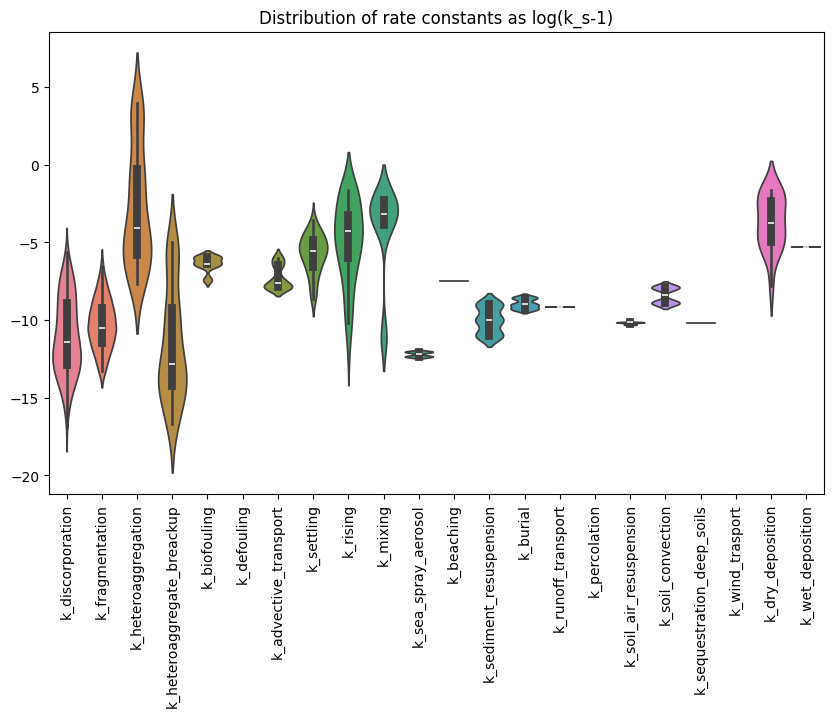

<Figure size 640x480 with 0 Axes>

In [13]:

plot_rateConstants_json(model_json_updated)

update model_json document in mongodb

In [14]:
model_json_collection.update_one(
    {'_id': model_id},     
    {'$set': model_json_updated}    
)

print("Updated model_json in MongoDB.")

Updated model_json in MongoDB.


In [15]:
model_json = model_json_collection.find_one({'_id': model_id})
system_particle_object_list = model_json["system_particle_object_list"]
SpeciesList = model_json["SpeciesList"]
dict_comp = model_json["dict_comp"]

In [16]:
interaction_collection = db["interaction"]
doc = interaction_collection.insert_one({"model_id": model_id})
inserted_id = doc.inserted_id
interaction_documentation = interaction_collection.find_one({"_id": inserted_id})
interaction_id = interaction_documentation["_id"]

In [ ]:
interaction_df = fillInteractions_fun_OOP_json(system_particle_object_list, SpeciesList, dict_comp).to_dict()

In [18]:
print(json.dumps(interaction_df, indent=2))

{
  "aA0_Utopia": {
    "aA0_Utopia": -0.0027612210423610534,
    "bA0_Utopia": 0.0,
    "cA0_Utopia": 0.0,
    "dA0_Utopia": 0.0,
    "eA0_Utopia": 0.0,
    "aB0_Utopia": 2.246885287461167e-08,
    "bB0_Utopia": 0.0,
    "cB0_Utopia": 0.0,
    "dB0_Utopia": 0.0,
    "eB0_Utopia": 0.0,
    "aC0_Utopia": 1.1574074074074074e-06,
    "bC0_Utopia": 0.0,
    "cC0_Utopia": 0.0,
    "dC0_Utopia": 0.0,
    "eC0_Utopia": 0.0,
    "aD0_Utopia": 0.0,
    "bD0_Utopia": 0.0,
    "cD0_Utopia": 0.0,
    "dD0_Utopia": 0.0,
    "eD0_Utopia": 0.0,
    "aA1_Utopia": 0.00276,
    "bA1_Utopia": 0.0,
    "cA1_Utopia": 0.0,
    "dA1_Utopia": 0.0,
    "eA1_Utopia": 0.0,
    "aB1_Utopia": 0.0,
    "bB1_Utopia": 0.0,
    "cB1_Utopia": 0.0,
    "dB1_Utopia": 0.0,
    "eB1_Utopia": 0.0,
    "aC1_Utopia": 0.0,
    "bC1_Utopia": 0.0,
    "cC1_Utopia": 0.0,
    "dC1_Utopia": 0.0,
    "eC1_Utopia": 0.0,
    "aD1_Utopia": 0.0,
    "bD1_Utopia": 0.0,
    "cD1_Utopia": 0.0,
    "dD1_Utopia": 0.0,
    "eD1_Utopia": 0.0,


In [20]:
interaction_collection.update_one(
    {"_id": inserted_id},  # Query for the document you just inserted
    {"$set": {"interaction_df": interaction_df}}  # Set the new field
)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)